In [1]:
import numpy as np
import pandas as pd

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [2]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")

# operating system
import os

# time calculation to track some processes
import time

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# python core library for machine learning and data science
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler,StandardScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("data\datasetsemana2.csv", index_col=0)

In [4]:
df

,id,item,category,department,store,store_code,region,date,unidades,event,year,yearweek,month,precio_imputado,ganancias_semana
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-06,0,1,2011,201105,2,10.99,0.00
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-13,0,0,2011,201106,2,10.99,0.00
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-27,0,0,2011,201108,2,10.99,0.00
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-03-20,0,0,2011,201111,3,10.99,0.00
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-03-27,0,0,2011,201112,3,10.99,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4177102,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-02-14,17,0,2016,201606,2,1.20,20.40
4177103,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-02-21,9,0,2016,201607,2,1.20,10.80
4177104,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-03-20,15,0,2016,201611,3,1.20,18.00
4177105,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-04-10,8,0,2016,201614,4,1.20,9.60


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4177107 entries, 0 to 4177106
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                object 
 1   item              object 
 2   category          object 
 3   department        object 
 4   store             object 
 5   store_code        object 
 6   region            object 
 7   date              object 
 8   unidades          int64  
 9   event             int64  
 10  year              int64  
 11  yearweek          int64  
 12  month             int64  
 13  precio_imputado   float64
 14  ganancias_semana  float64
dtypes: float64(2), int64(5), object(8)
memory usage: 509.9+ MB


In [6]:
df_if = df["item"].nunique()
print(f"Tenemos un total de {df_if} items únicos")

Tenemos un total de 3049 items únicos


In [7]:
df_cat = df[["category", "item"]].drop_duplicates().reset_index(drop=True)

In [8]:
df_cat

,category,item
0,ACCESORIES,ACCESORIES_1_001
1,ACCESORIES,ACCESORIES_1_002
2,ACCESORIES,ACCESORIES_1_003
3,ACCESORIES,ACCESORIES_1_004
4,ACCESORIES,ACCESORIES_1_005
...,...,...
3044,SUPERMARKET,SUPERMARKET_3_823
3045,SUPERMARKET,SUPERMARKET_3_824
3046,SUPERMARKET,SUPERMARKET_3_825
3047,SUPERMARKET,SUPERMARKET_3_826


In [9]:
df_cat["category"].value_counts()

category
SUPERMARKET      1437
HOME_&_GARDEN    1047
ACCESORIES        565
Name: count, dtype: int64

Creamos el df para agrupar por item y creamos variables para identificar grupos

In [10]:
df

,id,item,category,department,store,store_code,region,date,unidades,event,year,yearweek,month,precio_imputado,ganancias_semana
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-06,0,1,2011,201105,2,10.99,0.00
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-13,0,0,2011,201106,2,10.99,0.00
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-27,0,0,2011,201108,2,10.99,0.00
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-03-20,0,0,2011,201111,3,10.99,0.00
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-03-27,0,0,2011,201112,3,10.99,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4177102,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-02-14,17,0,2016,201606,2,1.20,20.40
4177103,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-02-21,9,0,2016,201607,2,1.20,10.80
4177104,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-03-20,15,0,2016,201611,3,1.20,18.00
4177105,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-04-10,8,0,2016,201614,4,1.20,9.60


In [11]:
df_item = df.set_index("item")


df_item = df_item.groupby(['item']).agg(
    total_uds = ('unidades', 'sum'),
    mean_price = ("precio_imputado", 'mean'),
    min_price = ("precio_imputado", 'min'),
    max_price = ("precio_imputado", 'max'),
    total_rev = ('ganancias_semana', 'sum'),
    )
df_item.reset_index(inplace=True)
df_item

,item,total_uds,mean_price,min_price,max_price,total_rev
0,ACCESORIES_1_001,1971,11.19,6.65,12.74,"21,673.71"
1,ACCESORIES_1_002,2578,5.28,2.66,5.28,"13,609.48"
2,ACCESORIES_1_003,695,3.95,1.25,7.94,"2,738.67"
3,ACCESORIES_1_004,19815,5.97,5.01,6.17,"118,998.92"
4,ACCESORIES_1_005,7567,3.83,2.00,4.10,"28,729.80"
...,...,...,...,...,...,...
3044,SUPERMARKET_3_823,7624,3.35,1.19,3.58,"25,351.42"
3045,SUPERMARKET_3_824,4012,3.02,2.40,3.22,"12,255.17"
3046,SUPERMARKET_3_825,6491,4.94,2.40,5.26,"31,583.08"
3047,SUPERMARKET_3_826,6268,1.54,1.54,1.54,"9,627.65"


In [12]:
df_item.isnull().sum()

item          0
total_uds     0
mean_price    0
min_price     0
max_price     0
total_rev     0
dtype: int64

Se obtiene la variable de rango de precio

In [13]:
df_item["range_price"]=df_item["max_price"]-df_item["min_price"]
df_item

,item,total_uds,mean_price,min_price,max_price,total_rev,range_price
0,ACCESORIES_1_001,1971,11.19,6.65,12.74,"21,673.71",6.09
1,ACCESORIES_1_002,2578,5.28,2.66,5.28,"13,609.48",2.62
2,ACCESORIES_1_003,695,3.95,1.25,7.94,"2,738.67",6.69
3,ACCESORIES_1_004,19815,5.97,5.01,6.17,"118,998.92",1.16
4,ACCESORIES_1_005,7567,3.83,2.00,4.10,"28,729.80",2.10
...,...,...,...,...,...,...,...
3044,SUPERMARKET_3_823,7624,3.35,1.19,3.58,"25,351.42",2.39
3045,SUPERMARKET_3_824,4012,3.02,2.40,3.22,"12,255.17",0.82
3046,SUPERMARKET_3_825,6491,4.94,2.40,5.26,"31,583.08",2.86
3047,SUPERMARKET_3_826,6268,1.54,1.54,1.54,"9,627.65",0.00


Se crea la sumatoria de unidades por mes para evaluar estacionalidad de la ventas

In [14]:
unidades_mes = pd.pivot_table(df, values='unidades', index='item', columns='month', aggfunc=sum, fill_value=0).reset_index()

In [15]:
unidades_mes.columns = unidades_mes.columns.astype(str)

In [16]:
unidades_mes

month,item,1,2,3,4,5,6,7,8,9,10,11,12
0,ACCESORIES_1_001,196,195,254,162,91,90,110,152,155,155,239,172
1,ACCESORIES_1_002,153,192,177,137,139,179,209,225,240,262,231,434
2,ACCESORIES_1_003,60,61,95,69,54,50,46,55,51,30,43,81
3,ACCESORIES_1_004,1705,1847,1854,1967,1730,1538,1492,1371,1512,1406,1794,1599
4,ACCESORIES_1_005,639,553,445,381,467,600,708,687,629,747,797,914
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,SUPERMARKET_3_823,526,766,793,623,551,450,617,720,840,507,718,513
3045,SUPERMARKET_3_824,183,276,297,560,291,481,444,380,356,342,230,172
3046,SUPERMARKET_3_825,526,796,664,616,479,491,592,676,325,455,365,506
3047,SUPERMARKET_3_826,478,537,579,638,591,532,599,507,502,459,420,426


In [17]:
print(df_item.shape)
print(df_cat.shape)
print(unidades_mes.shape)

(3049, 7)
(3049, 2)
(3049, 13)


unimos al dataset

In [18]:
df_ = pd.merge(df_item,unidades_mes,on='item', how ='inner' )
df_= pd.merge(df_,df_cat,on='item', how ='inner' )
df_


,item,total_uds,mean_price,min_price,max_price,total_rev,range_price,1,2,3,4,5,6,7,8,9,10,11,12,category
0,ACCESORIES_1_001,1971,11.19,6.65,12.74,"21,673.71",6.09,196,195,254,162,91,90,110,152,155,155,239,172,ACCESORIES
1,ACCESORIES_1_002,2578,5.28,2.66,5.28,"13,609.48",2.62,153,192,177,137,139,179,209,225,240,262,231,434,ACCESORIES
2,ACCESORIES_1_003,695,3.95,1.25,7.94,"2,738.67",6.69,60,61,95,69,54,50,46,55,51,30,43,81,ACCESORIES
3,ACCESORIES_1_004,19815,5.97,5.01,6.17,"118,998.92",1.16,1705,1847,1854,1967,1730,1538,1492,1371,1512,1406,1794,1599,ACCESORIES
4,ACCESORIES_1_005,7567,3.83,2.00,4.10,"28,729.80",2.10,639,553,445,381,467,600,708,687,629,747,797,914,ACCESORIES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,SUPERMARKET_3_823,7624,3.35,1.19,3.58,"25,351.42",2.39,526,766,793,623,551,450,617,720,840,507,718,513,SUPERMARKET
3045,SUPERMARKET_3_824,4012,3.02,2.40,3.22,"12,255.17",0.82,183,276,297,560,291,481,444,380,356,342,230,172,SUPERMARKET
3046,SUPERMARKET_3_825,6491,4.94,2.40,5.26,"31,583.08",2.86,526,796,664,616,479,491,592,676,325,455,365,506,SUPERMARKET
3047,SUPERMARKET_3_826,6268,1.54,1.54,1.54,"9,627.65",0.00,478,537,579,638,591,532,599,507,502,459,420,426,SUPERMARKET


In [19]:
df_.shape

(3049, 20)

Separamos en tres datasets por category

In [20]:
df_acc = df_[df_["category"]=="ACCESORIES"]
df_acc= df_acc.drop("category", axis=1)
df_acc = df_acc.set_index("item")
df_acc


,total_uds,mean_price,min_price,max_price,total_rev,range_price,1,2,3,4,5,6,7,8,9,10,11,12
item,,,,,,,,,,,,,,,,,,
ACCESORIES_1_001,1971,11.19,6.65,12.74,"21,673.71",6.09,196,195,254,162,91,90,110,152,155,155,239,172
ACCESORIES_1_002,2578,5.28,2.66,5.28,"13,609.48",2.62,153,192,177,137,139,179,209,225,240,262,231,434
ACCESORIES_1_003,695,3.95,1.25,7.94,"2,738.67",6.69,60,61,95,69,54,50,46,55,51,30,43,81
ACCESORIES_1_004,19815,5.97,5.01,6.17,"118,998.92",1.16,1705,1847,1854,1967,1730,1538,1492,1371,1512,1406,1794,1599
ACCESORIES_1_005,7567,3.83,2.00,4.10,"28,729.80",2.10,639,553,445,381,467,600,708,687,629,747,797,914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACCESORIES_2_145,2609,3.68,3.30,3.83,"9,708.67",0.53,220,293,330,251,214,217,204,231,175,185,164,125
ACCESORIES_2_146,2021,2.62,1.33,2.62,"5,295.22",1.29,128,126,165,200,194,161,166,186,202,203,163,127
ACCESORIES_2_147,1602,1.29,1.29,1.29,"2,066.74",0.00,95,125,166,157,130,104,85,163,139,146,124,168


In [21]:
df_home = df_[df_["category"]=="HOME_&_GARDEN"]
df_home= df_home.drop("category", axis=1)
df_home = df_home.set_index("item")
df_home

,total_uds,mean_price,min_price,max_price,total_rev,range_price,1,2,3,4,5,6,7,8,9,10,11,12
item,,,,,,,,,,,,,,,,,,
HOME_&_GARDEN_1_001,3067,7.61,3.12,9.15,"23,463.89",6.03,247,290,266,294,238,278,240,300,240,241,235,198
HOME_&_GARDEN_1_002,4370,7.56,3.75,9.15,"33,061.85",5.40,373,463,359,370,307,419,392,387,378,312,267,343
HOME_&_GARDEN_1_003,5569,11.21,11.21,11.21,"62,442.41",0.00,391,472,455,422,367,526,419,855,501,377,455,329
HOME_&_GARDEN_1_004,16073,2.75,2.34,2.96,"45,104.50",0.62,1752,1267,1319,1002,844,957,770,1372,1155,1865,2037,1733
HOME_&_GARDEN_1_005,8567,12.56,6.10,13.40,"107,356.12",7.30,771,963,829,823,642,612,590,620,629,451,792,845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HOME_&_GARDEN_2_512,5916,4.96,4.96,5.34,"29,360.78",0.38,354,466,518,564,579,763,559,495,436,374,459,349
HOME_&_GARDEN_2_513,4094,3.48,3.48,3.48,"14,226.65",0.00,293,355,355,309,314,374,456,399,285,330,280,344
HOME_&_GARDEN_2_514,1582,23.49,18.68,26.21,"37,359.50",7.54,127,149,161,123,97,111,126,121,144,117,188,118


In [22]:
df_super = df_[df_["category"]=="SUPERMARKET"]
df_super= df_super.drop("category", axis=1)
df_super = df_super.set_index("item")
df_super

,total_uds,mean_price,min_price,max_price,total_rev,range_price,1,2,3,4,5,6,7,8,9,10,11,12
item,,,,,,,,,,,,,,,,,,
SUPERMARKET_1_001,6169,2.60,1.19,2.69,"15,918.60",1.50,432,488,655,557,574,547,545,444,556,365,488,518
SUPERMARKET_1_002,3454,10.69,9.19,11.38,"36,958.20",2.18,261,300,333,366,302,275,243,273,319,278,229,275
SUPERMARKET_1_003,6791,3.56,3.46,3.88,"24,008.98",0.42,447,695,652,539,520,646,445,563,660,587,506,531
SUPERMARKET_1_004,63759,2.19,1.80,2.35,"138,896.57",0.55,4856,4451,7135,6081,6096,6991,6355,4914,4830,2878,4350,4822
SUPERMARKET_1_005,12419,3.99,3.00,4.25,"49,773.26",1.25,1205,1683,1407,963,411,199,159,624,1759,1277,1278,1454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUPERMARKET_3_823,7624,3.35,1.19,3.58,"25,351.42",2.39,526,766,793,623,551,450,617,720,840,507,718,513
SUPERMARKET_3_824,4012,3.02,2.40,3.22,"12,255.17",0.82,183,276,297,560,291,481,444,380,356,342,230,172
SUPERMARKET_3_825,6491,4.94,2.40,5.26,"31,583.08",2.86,526,796,664,616,479,491,592,676,325,455,365,506


Chequeamos que tengamos la misma cantidad de unidades que el df original

In [23]:
df_["total_uds"].sum()

32822341

In [24]:
df["unidades"].sum()

32822341

*Accesories

Escalamos variables numericas

In [25]:
scaler= MinMaxScaler()

In [26]:
df_acc_scaled=scaler.fit_transform(df_acc)

In [27]:
df_acc_scaled

,total_uds,mean_price,min_price,max_price,total_rev,range_price,1,2,3,4,5,6,7,8,9,10,11,12
item,,,,,,,,,,,,,,,,,,
ACCESORIES_1_001,0.03,0.28,0.19,0.30,0.05,0.41,0.05,0.03,0.04,0.02,0.02,0.02,0.02,0.03,0.03,0.03,0.05,0.04
ACCESORIES_1_002,0.04,0.13,0.07,0.12,0.03,0.17,0.04,0.03,0.02,0.02,0.03,0.03,0.04,0.04,0.05,0.05,0.04,0.10
ACCESORIES_1_003,0.01,0.09,0.03,0.19,0.01,0.45,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.01,0.02
ACCESORIES_1_004,0.32,0.14,0.14,0.14,0.28,0.08,0.39,0.31,0.28,0.34,0.39,0.29,0.29,0.27,0.34,0.26,0.37,0.37
ACCESORIES_1_005,0.12,0.09,0.06,0.09,0.07,0.14,0.15,0.09,0.06,0.06,0.10,0.11,0.14,0.14,0.14,0.14,0.16,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACCESORIES_2_145,0.04,0.09,0.09,0.09,0.02,0.04,0.05,0.05,0.05,0.04,0.05,0.04,0.04,0.04,0.04,0.03,0.03,0.03
ACCESORIES_2_146,0.03,0.06,0.04,0.06,0.01,0.09,0.03,0.02,0.02,0.03,0.04,0.03,0.03,0.04,0.04,0.03,0.03,0.03
ACCESORIES_2_147,0.02,0.03,0.04,0.02,0.00,0.00,0.02,0.02,0.02,0.02,0.03,0.02,0.02,0.03,0.03,0.02,0.02,0.04


In [28]:
df_acc

,total_uds,mean_price,min_price,max_price,total_rev,range_price,1,2,3,4,5,6,7,8,9,10,11,12
item,,,,,,,,,,,,,,,,,,
ACCESORIES_1_001,1971,11.19,6.65,12.74,"21,673.71",6.09,196,195,254,162,91,90,110,152,155,155,239,172
ACCESORIES_1_002,2578,5.28,2.66,5.28,"13,609.48",2.62,153,192,177,137,139,179,209,225,240,262,231,434
ACCESORIES_1_003,695,3.95,1.25,7.94,"2,738.67",6.69,60,61,95,69,54,50,46,55,51,30,43,81
ACCESORIES_1_004,19815,5.97,5.01,6.17,"118,998.92",1.16,1705,1847,1854,1967,1730,1538,1492,1371,1512,1406,1794,1599
ACCESORIES_1_005,7567,3.83,2.00,4.10,"28,729.80",2.10,639,553,445,381,467,600,708,687,629,747,797,914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACCESORIES_2_145,2609,3.68,3.30,3.83,"9,708.67",0.53,220,293,330,251,214,217,204,231,175,185,164,125
ACCESORIES_2_146,2021,2.62,1.33,2.62,"5,295.22",1.29,128,126,165,200,194,161,166,186,202,203,163,127
ACCESORIES_2_147,1602,1.29,1.29,1.29,"2,066.74",0.00,95,125,166,157,130,104,85,163,139,146,124,168


Segun pedido de negocio se evaluan clusters por categoria

In [29]:
sse_acc = {}

for k in range(2, 5):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k)
    clustering_model.fit(df_acc_scaled)

    sse_acc[k] = clustering_model.inertia_

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters


Elbow Curve

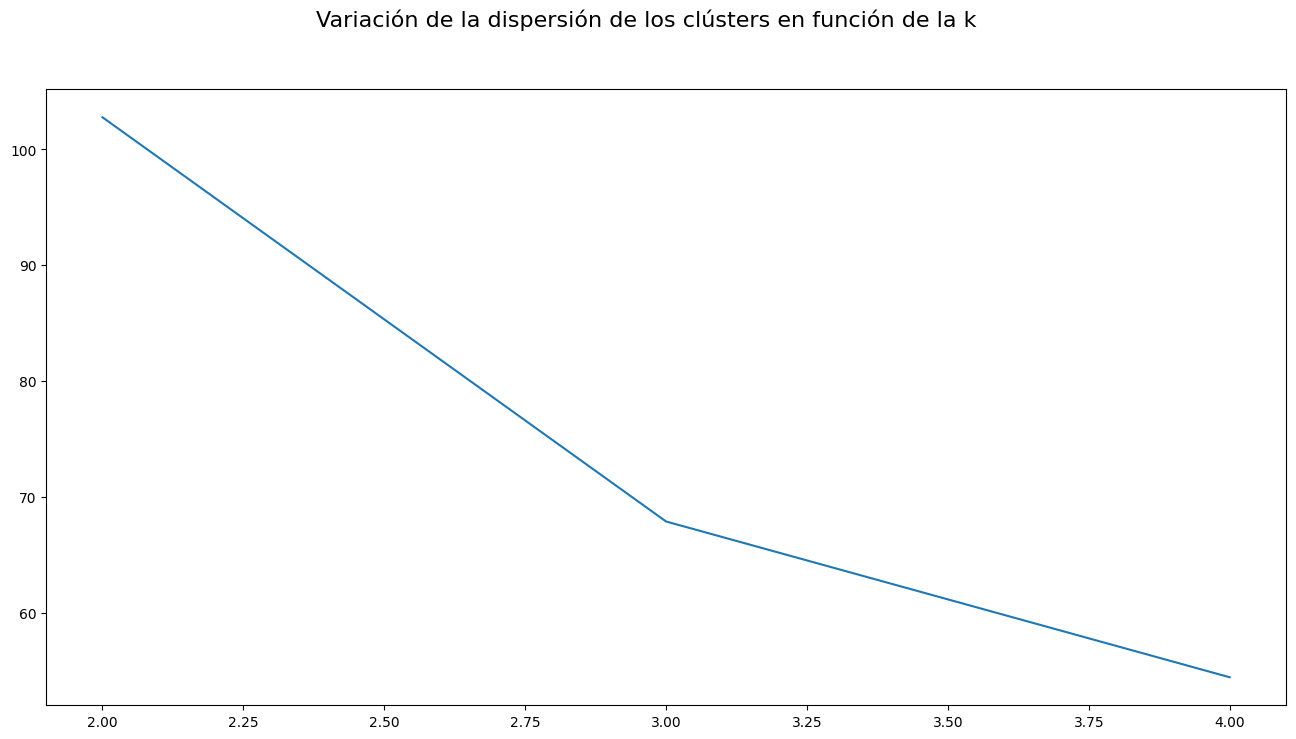

In [30]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sse_acc.keys())
y_values = list(sse_acc.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

Segmentacion de items

In [31]:
clustering_model = KMeans(n_clusters = 3, random_state=42)
clustering_model.fit(df_acc_scaled)

KMeans(n_clusters=3, random_state=42)

In [32]:
labels = clustering_model.predict(df_acc_scaled)
df_acc["cluster"] = labels

In [33]:
df_acc

,total_uds,mean_price,min_price,max_price,total_rev,range_price,1,2,3,4,5,6,7,8,9,10,11,12,cluster
item,,,,,,,,,,,,,,,,,,,
ACCESORIES_1_001,1971,11.19,6.65,12.74,"21,673.71",6.09,196,195,254,162,91,90,110,152,155,155,239,172,2
ACCESORIES_1_002,2578,5.28,2.66,5.28,"13,609.48",2.62,153,192,177,137,139,179,209,225,240,262,231,434,0
ACCESORIES_1_003,695,3.95,1.25,7.94,"2,738.67",6.69,60,61,95,69,54,50,46,55,51,30,43,81,0
ACCESORIES_1_004,19815,5.97,5.01,6.17,"118,998.92",1.16,1705,1847,1854,1967,1730,1538,1492,1371,1512,1406,1794,1599,1
ACCESORIES_1_005,7567,3.83,2.00,4.10,"28,729.80",2.10,639,553,445,381,467,600,708,687,629,747,797,914,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACCESORIES_2_145,2609,3.68,3.30,3.83,"9,708.67",0.53,220,293,330,251,214,217,204,231,175,185,164,125,0
ACCESORIES_2_146,2021,2.62,1.33,2.62,"5,295.22",1.29,128,126,165,200,194,161,166,186,202,203,163,127,0
ACCESORIES_2_147,1602,1.29,1.29,1.29,"2,066.74",0.00,95,125,166,157,130,104,85,163,139,146,124,168,0


In [34]:
df_acc.to_csv('acc_clusters.csv')

vamos a intentar armar la ficha

In [35]:
dfs_acc = []  # Crea una lista vacía

In [36]:
for i, col in enumerate(["total_uds","mean_price","range_price", "total_rev"]):
    resumen_data = df_acc[["cluster", col]].groupby("cluster").describe().T[1:]
    dfs_acc.append(resumen_data)  # Agrega cada DataFrame a la lista

In [37]:
ficha_df_acc = pd.concat(dfs_acc)

In [38]:
ficha_df_acc

cluster                   0          1          2
total_uds   mean   3,325.15  32,247.40   3,536.38
            std    3,139.19  10,290.49   3,109.10
            min      375.00  18,763.00     411.00
            25%    1,135.50  24,433.75   1,359.25
            50%    2,187.00  28,795.50   2,227.00
            75%    4,479.00  38,368.50   4,942.00
            max   17,425.00  60,703.00  13,918.00
mean_price  mean       4.61       1.43      17.67
            std        2.86       2.28       6.27
            min        0.31       0.40      10.13
            25%        2.29       0.63      13.25
            50%        3.95       0.74      16.15
            75%        6.60       0.94      19.68
            max       11.94      13.37      39.44
range_price mean       1.09       0.41       3.86
            std        1.44       0.44       3.41
            min        0.00       0.00       0.00
            25%        0.04       0.19       1.35
            50%        0.55       0.32       2.66
            75%        1.38       0.44       5.63
            max        9.18       2.26      14.98
total_rev   mean  14,778.54  38,217.27  59,867.86
            std   16,996.82  45,280.63  59,415.96
            min      282.04  11,372.30   5,449.90
            25%    3,627.57  21,197.91  23,287.68
            50%    8,629.94  25,937.79  40,774.04
            75%   19,354.98  30,928.87  77,010.78
            max  114,932.87 269,197.63 422,456.73

In [39]:
# generamos nuestro multiindex
out_index = [
    "Cantidad",
    "Monetario",
    "Monetario",
    "Monetario"
]

inner_index = [
    "Total Unidades",
    "Precio Promedio",
    "Rango de precio",
    "Ganancia"
]

estadisticos = ["Media", "Desviación", "Mínimo", "Perc. 25", "Perc. 50", "Perc. 75", "Máximo"]

new_multi_index = []

for oi, ii, in zip(out_index, inner_index):
    for es in estadisticos:
        new_multi_index.append((oi, ii, es))

In [40]:
def generate_multiindex(list_of_tuples, names):
    return pd.MultiIndex.from_tuples(list_of_tuples, names = names)

In [41]:
names = ["Grupo Indicadores", "Indicador", "Estadístico"]
index_ficha = generate_multiindex(new_multi_index, names)
ficha_df_acc.set_index(index_ficha, inplace = True)

In [42]:
tamaño_clusters = df_acc.groupby("cluster").size().to_frame().T
tamaño_clusters.set_index(generate_multiindex([("General", "Clúster", "Tamaño")] , names), inplace = True)

In [43]:
ficha_df = pd.concat([tamaño_clusters, ficha_df_acc])

In [44]:
ficha_df

cluster                                                0          1          2
Grupo Indicadores Indicador       Estadístico                                 
General           Clúster         Tamaño          395.00      40.00     130.00
Cantidad          Total Unidades  Media         3,325.15  32,247.40   3,536.38
                                  Desviación    3,139.19  10,290.49   3,109.10
                                  Mínimo          375.00  18,763.00     411.00
                                  Perc. 25      1,135.50  24,433.75   1,359.25
                                  Perc. 50      2,187.00  28,795.50   2,227.00
                                  Perc. 75      4,479.00  38,368.50   4,942.00
                                  Máximo       17,425.00  60,703.00  13,918.00
Monetario         Precio Promedio Media             4.61       1.43      17.67
                                  Desviación        2.86       2.28       6.27
                                  Mínimo            0.31       0.40      10.13
                                  Perc. 25          2.29       0.63      13.25
                                  Perc. 50          3.95       0.74      16.15
                                  Perc. 75          6.60       0.94      19.68
                                  Máximo           11.94      13.37      39.44
                  Rango de precio Media             1.09       0.41       3.86
                                  Desviación        1.44       0.44       3.41
                                  Mínimo            0.00       0.00       0.00
                                  Perc. 25          0.04       0.19       1.35
                                  Perc. 50          0.55       0.32       2.66
                                  Perc. 75          1.38       0.44       5.63
                                  Máximo            9.18       2.26      14.98
                  Ganancia        Media        14,778.54  38,217.27  59,867.86
                                  Desviación   16,996.82  45,280.63  59,415.96
                                  Mínimo          282.04  11,372.30   5,449.90
                                  Perc. 25      3,627.57  21,197.91  23,287.68
                                  Perc. 50      8,629.94  25,937.79  40,774.04
                                  Perc. 75     19,354.98  30,928.87  77,010.78
                                  Máximo      114,932.87 269,197.63 422,456.73

In [45]:
ficha_df = ficha_df.rename(columns = {
    0 : "Items Medium Sales",
    1 : "Items Top Sales",
    2 : "Items Premium"
})

In [46]:
ficha_df.style.background_gradient(cmap = 'Blues', axis = 1)

Se ha evaluado tambien por la sumatoria de meses, quitanto el total de unidades sin embargo la agrupacion responde con los mismos resultados. La popularidad del producto viene de determinada las unidades vendidas y muchos de los items son constantes durante todo el año. Se espera evaluar en siguiente modelo si existe variabilidad en fin de semanas o festivos.

Cluster Medium Sales: Este cluster tiene un tamaño relativamente grande (395 observaciones) y una cantidad de unidades promedio de 3,325.15. El rango de unidades varía desde 375 hasta 17,425, lo que indica cierta dispersión en los datos. El precio promedio es de 4.61, con un rango que va desde 0.31 hasta 11.94. La ganancia promedio es de 14,778.54, con un rango que va desde 282.04 hasta 114,932.87. En general, parece que este cluster tiene un tamaño moderado, precios y ganancias promedio, y una distribución de unidades relativamente amplia. Compuesto por productos que pueden acompañar a otros pero no son de suma importancia.

Cluster Top Sales: Este cluster es más pequeño en tamaño, con solo 40 observaciones. Sin embargo, muestra una mayor cantidad de unidades promedio de 32,247.40. El rango de unidades varía desde 18,763 hasta 60,703, lo que indica una mayor variabilidad en comparación con otros clusters. El precio promedio es bajo, con un valor de 1.43, y el rango de precios va desde 0.40 hasta 13.37. La ganancia promedio es alta, con un valor de 38,217.27 y un rango que va desde 11,372.30 hasta 269,197.63. Esto sugiere que este cluster tiene una alta variabilidad en la cantidad de unidades, precios relativamente bajos y ganancias significativas.

Cluster Items_premium: Este cluster tiene un tamaño de 130 observaciones y una cantidad de unidades promedio de 3,536.38. El rango de unidades varía desde 411 hasta 13,918. El precio promedio es alto en comparación con otros clusters, con un valor de 17.67 y un rango que va desde 10.13 hasta 39.44. La ganancia promedio es la más alta entre los clusters, con un valor de 59,867.86 y un rango que va desde 5,449.90 hasta 422,456.73. Esto indica que este cluster tiene un tamaño moderado, precios altos y ganancias significativas.

*Home and Garden*

In [47]:
df_home_scaled=scaler.fit_transform(df_home)
df_home_scaled

,total_uds,mean_price,min_price,max_price,total_rev,range_price,1,2,3,4,5,6,7,8,9,10,11,12
item,,,,,,,,,,,,,,,,,,
HOME_&_GARDEN_1_001,0.03,0.18,0.14,0.19,0.06,0.15,0.04,0.04,0.02,0.03,0.04,0.03,0.03,0.04,0.03,0.04,0.03,0.03
HOME_&_GARDEN_1_002,0.05,0.18,0.17,0.19,0.09,0.13,0.05,0.06,0.03,0.04,0.05,0.05,0.05,0.05,0.04,0.05,0.04,0.05
HOME_&_GARDEN_1_003,0.06,0.28,0.50,0.23,0.17,0.00,0.06,0.06,0.04,0.05,0.06,0.07,0.06,0.10,0.06,0.06,0.06,0.05
HOME_&_GARDEN_1_004,0.18,0.05,0.10,0.05,0.12,0.02,0.25,0.16,0.12,0.11,0.13,0.12,0.10,0.16,0.14,0.30,0.29,0.27
HOME_&_GARDEN_1_005,0.09,0.32,0.27,0.28,0.30,0.18,0.11,0.12,0.08,0.09,0.10,0.08,0.08,0.07,0.07,0.07,0.11,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HOME_&_GARDEN_2_512,0.06,0.11,0.22,0.10,0.08,0.01,0.05,0.06,0.05,0.06,0.09,0.10,0.08,0.06,0.05,0.06,0.06,0.06
HOME_&_GARDEN_2_513,0.04,0.07,0.15,0.06,0.04,0.00,0.04,0.04,0.03,0.03,0.05,0.05,0.06,0.05,0.03,0.05,0.04,0.05
HOME_&_GARDEN_2_514,0.01,0.62,0.83,0.58,0.10,0.18,0.02,0.02,0.01,0.01,0.01,0.01,0.02,0.01,0.02,0.02,0.03,0.02


In [48]:
sse_home = {}

for k in range(2,5):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k)
    clustering_model.fit(df_home_scaled)

    sse_home[k] = clustering_model.inertia_


Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters


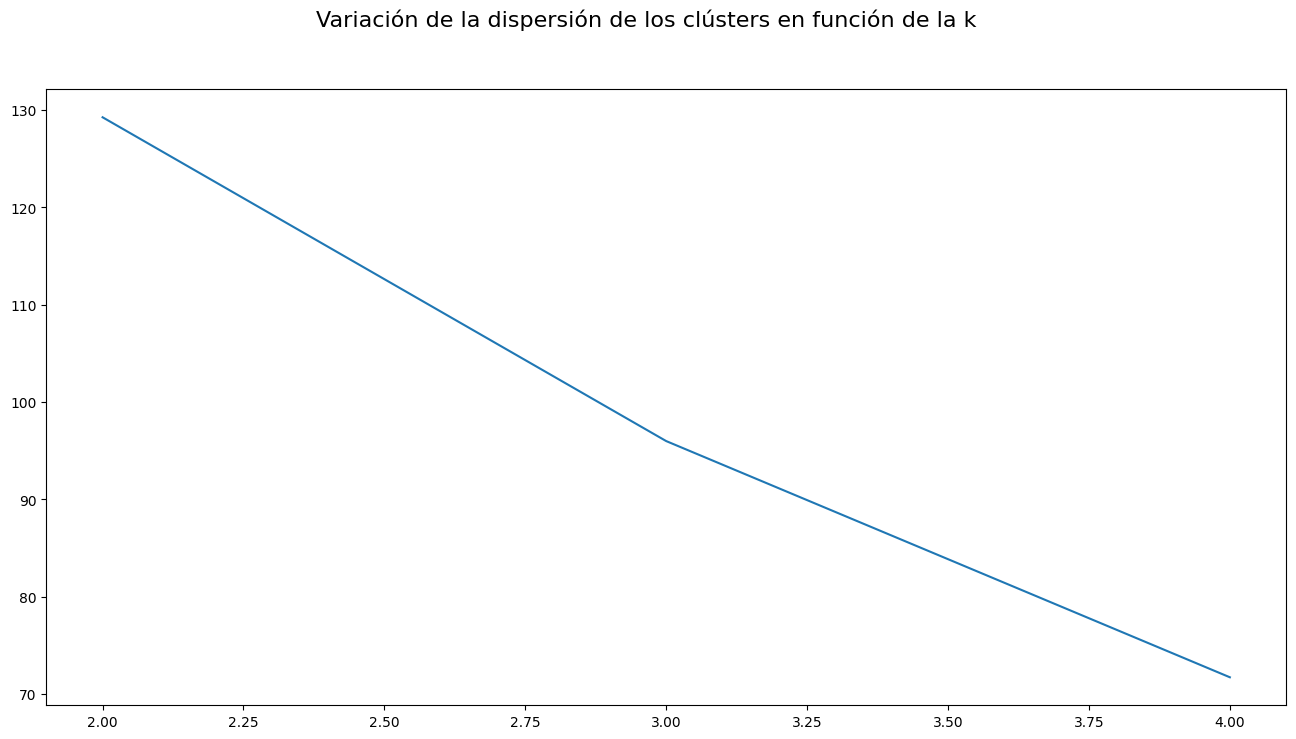

In [49]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sse_home.keys())
y_values = list(sse_home.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);


In [50]:
clustering_model = KMeans(n_clusters = 3, random_state=42)
clustering_model.fit(df_home_scaled)


KMeans(n_clusters=3, random_state=42)

In [51]:
labels = clustering_model.predict(df_home_scaled)
df_home["cluster"] = labels


In [52]:
df_home

,total_uds,mean_price,min_price,max_price,total_rev,range_price,1,2,3,4,5,6,7,8,9,10,11,12,cluster
item,,,,,,,,,,,,,,,,,,,
HOME_&_GARDEN_1_001,3067,7.61,3.12,9.15,"23,463.89",6.03,247,290,266,294,238,278,240,300,240,241,235,198,1
HOME_&_GARDEN_1_002,4370,7.56,3.75,9.15,"33,061.85",5.40,373,463,359,370,307,419,392,387,378,312,267,343,1
HOME_&_GARDEN_1_003,5569,11.21,11.21,11.21,"62,442.41",0.00,391,472,455,422,367,526,419,855,501,377,455,329,1
HOME_&_GARDEN_1_004,16073,2.75,2.34,2.96,"45,104.50",0.62,1752,1267,1319,1002,844,957,770,1372,1155,1865,2037,1733,0
HOME_&_GARDEN_1_005,8567,12.56,6.10,13.40,"107,356.12",7.30,771,963,829,823,642,612,590,620,629,451,792,845,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HOME_&_GARDEN_2_512,5916,4.96,4.96,5.34,"29,360.78",0.38,354,466,518,564,579,763,559,495,436,374,459,349,1
HOME_&_GARDEN_2_513,4094,3.48,3.48,3.48,"14,226.65",0.00,293,355,355,309,314,374,456,399,285,330,280,344,1
HOME_&_GARDEN_2_514,1582,23.49,18.68,26.21,"37,359.50",7.54,127,149,161,123,97,111,126,121,144,117,188,118,1


In [53]:
df_home.to_csv('home_clusters.csv')

In [54]:
dfs_home = [] 
for i, col in enumerate(["total_uds","mean_price","range_price", "total_rev"]):
    resumen_data = df_home[["cluster", col]].groupby("cluster").describe().T[1:]
    dfs_home.append(resumen_data)  # Agrega cada DataFrame a la lista
ficha_df_home = pd.concat(dfs_home)
ficha_df_home

cluster                   0          1          2
total_uds   mean  15,797.46   3,291.96  54,122.97
            std    6,165.40   2,254.75  14,687.92
            min    8,665.00     296.00  35,562.00
            25%   10,920.00   1,495.25  40,528.25
            50%   13,991.00   2,745.50  54,422.50
            75%   19,081.00   4,647.00  61,229.75
            max   33,260.00  11,480.00  88,513.00
mean_price  mean       4.25       7.50       2.36
            std        2.73       4.33       2.19
            min        0.97       1.19       1.16
            25%        2.43       4.68       1.21
            50%        3.60       6.48       1.22
            75%        5.40       8.99       2.84
            max       18.78      37.44      10.01
range_price mean       1.41       2.80       0.44
            std        1.53       3.75       0.72
            min        0.00       0.00       0.00
            25%        0.14       0.31       0.03
            50%        1.10       1.82       0.18
            75%        2.21       4.08       0.59
            max        6.85      40.78       3.75
total_rev   mean  65,349.28  23,744.60 114,613.10
            std   50,497.01  24,840.95  87,033.31
            min   10,494.11     957.91  44,406.88
            25%   34,472.21   9,412.95  66,976.22
            50%   52,073.80  17,657.39  79,167.48
            75%   73,374.44  29,188.63 113,716.32
            max  330,482.54 225,938.32 357,708.42

In [55]:
names = ["Grupo Indicadores", "Indicador", "Estadístico"]
index_ficha = generate_multiindex(new_multi_index, names)
ficha_df_home.set_index(index_ficha, inplace = True)

In [56]:
tamaño_clusters = df_home.groupby("cluster").size().to_frame().T
tamaño_clusters.set_index(generate_multiindex([("General", "Clúster", "Tamaño")] , names), inplace = True)

In [57]:
ficha_df_home = pd.concat([tamaño_clusters, ficha_df_home])


In [58]:
ficha_df_home

cluster                                                0          1          2
Grupo Indicadores Indicador       Estadístico                                 
General           Clúster         Tamaño          173.00     842.00      32.00
Cantidad          Total Unidades  Media        15,797.46   3,291.96  54,122.97
                                  Desviación    6,165.40   2,254.75  14,687.92
                                  Mínimo        8,665.00     296.00  35,562.00
                                  Perc. 25     10,920.00   1,495.25  40,528.25
                                  Perc. 50     13,991.00   2,745.50  54,422.50
                                  Perc. 75     19,081.00   4,647.00  61,229.75
                                  Máximo       33,260.00  11,480.00  88,513.00
Monetario         Precio Promedio Media             4.25       7.50       2.36
                                  Desviación        2.73       4.33       2.19
                                  Mínimo            0.97       1.19       1.16
                                  Perc. 25          2.43       4.68       1.21
                                  Perc. 50          3.60       6.48       1.22
                                  Perc. 75          5.40       8.99       2.84
                                  Máximo           18.78      37.44      10.01
                  Rango de precio Media             1.41       2.80       0.44
                                  Desviación        1.53       3.75       0.72
                                  Mínimo            0.00       0.00       0.00
                                  Perc. 25          0.14       0.31       0.03
                                  Perc. 50          1.10       1.82       0.18
                                  Perc. 75          2.21       4.08       0.59
                                  Máximo            6.85      40.78       3.75
                  Ganancia        Media        65,349.28  23,744.60 114,613.10
                                  Desviación   50,497.01  24,840.95  87,033.31
                                  Mínimo       10,494.11     957.91  44,406.88
                                  Perc. 25     34,472.21   9,412.95  66,976.22
                                  Perc. 50     52,073.80  17,657.39  79,167.48
                                  Perc. 75     73,374.44  29,188.63 113,716.32
                                  Máximo      330,482.54 225,938.32 357,708.42

In [59]:
ficha_df_home = ficha_df_home.rename(columns = {
    0 : "Items Regulares",
    1 : "Items Premium",
    2 : "Items Top Sales"
})

In [60]:
ficha_df_home.style.background_gradient(cmap = 'Greens', axis = 1)

Cluster Items Regulares: Este cluster tiene un tamaño de 173 observaciones y una cantidad total de unidades media de aproximadamente 15,797.46. La desviación estándar indica cierta variabilidad en la cantidad de unidades. El precio promedio es de alrededor de 4.25 y la ganancia promedio es de aproximadamente 65,349.28. Esto sugiere que este cluster tiene un tamaño moderado, precios relativamente bajos y ganancias promedio.

Cluster Items Premium: Este cluster es el más grande, con 842 observaciones. Tiene una cantidad total de unidades media de aproximadamente 3,291.96. La desviación estándar indica una variabilidad relativamente baja en la cantidad de unidades en comparación con los otros clusters. El precio promedio es más alto, alrededor de 7.50, y la ganancia promedio es de aproximadamente 23,744.60. Esto indica que este cluster tiene un tamaño grande, precios más altos y ganancias promedio.

Cluster Items Top Sales: Este cluster es el más pequeño, con solo 32 observaciones. Tiene una cantidad total de unidades media de aproximadamente 54,122.97, lo que indica un alto volumen de unidades. El precio promedio es el más bajo de todos los clusters, alrededor de 2.36, y la ganancia promedio es la más alta, aproximadamente 114,613.10. Esto sugiere que este cluster tiene un tamaño pequeño pero una alta concentración de unidades, precios bajos y ganancias significativas.

*Supermarket

In [61]:
df_super_scaled=scaler.fit_transform(df_super)
df_super_scaled


,total_uds,mean_price,min_price,max_price,total_rev,range_price,1,2,3,4,5,6,7,8,9,10,11,12
item,,,,,,,,,,,,,,,,,,
SUPERMARKET_1_001,0.01,0.11,0.05,0.10,0.02,0.09,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
SUPERMARKET_1_002,0.01,0.47,0.43,0.48,0.04,0.13,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.01
SUPERMARKET_1_003,0.01,0.15,0.16,0.15,0.03,0.02,0.01,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
SUPERMARKET_1_004,0.13,0.09,0.08,0.09,0.16,0.03,0.11,0.12,0.17,0.16,0.16,0.16,0.16,0.11,0.09,0.06,0.08,0.13
SUPERMARKET_1_005,0.03,0.17,0.14,0.17,0.06,0.07,0.03,0.05,0.03,0.03,0.01,0.00,0.00,0.01,0.03,0.02,0.02,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUPERMARKET_3_823,0.02,0.14,0.05,0.14,0.03,0.14,0.01,0.02,0.02,0.02,0.01,0.01,0.02,0.02,0.01,0.01,0.01,0.01
SUPERMARKET_3_824,0.01,0.12,0.11,0.13,0.01,0.05,0.00,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00
SUPERMARKET_3_825,0.01,0.21,0.11,0.21,0.04,0.16,0.01,0.02,0.02,0.02,0.01,0.01,0.02,0.02,0.01,0.01,0.01,0.01


In [62]:
sse_super = {}

for k in range(2,10):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k)
    clustering_model.fit(df_super_scaled)

    sse_super[k] = clustering_model.inertia_



Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters


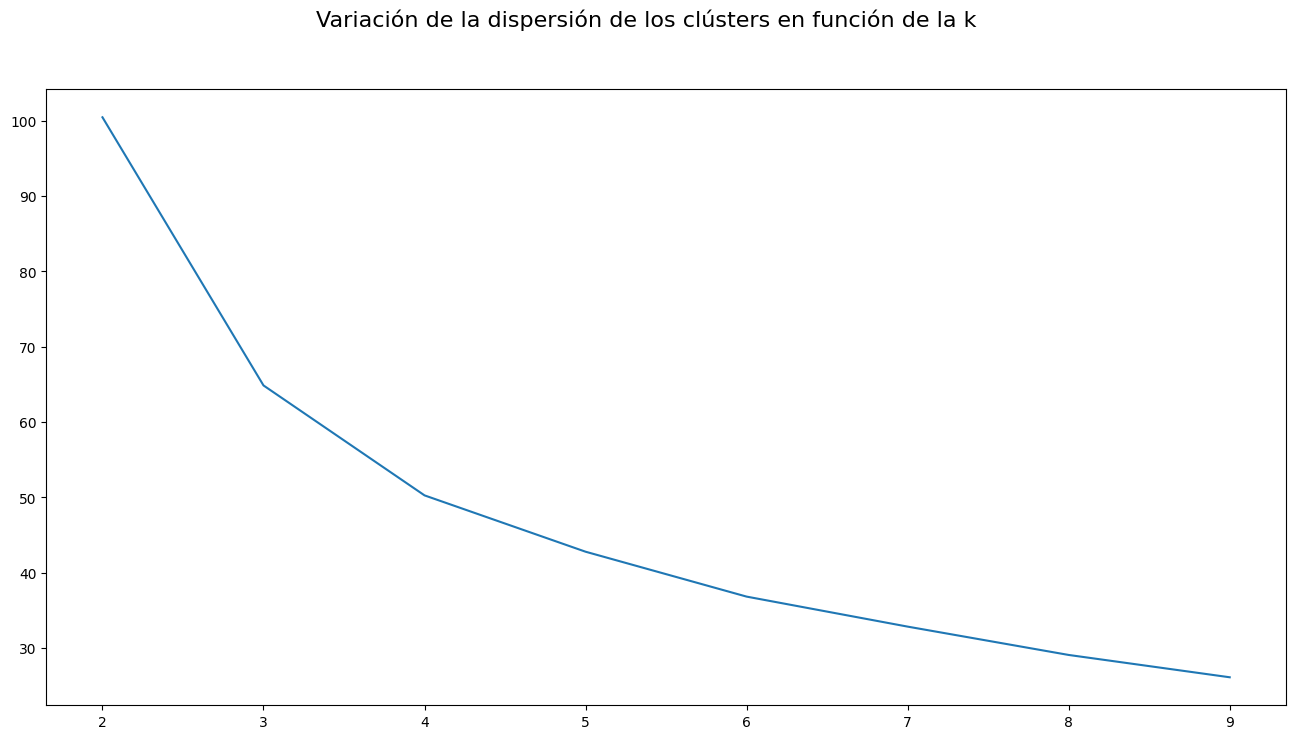

In [63]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sse_super.keys())
y_values = list(sse_super.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);


In [64]:
clustering_model = KMeans(n_clusters = 4, random_state=42)
clustering_model.fit(df_super_scaled)


KMeans(n_clusters=4, random_state=42)

In [65]:
labels = clustering_model.predict(df_super_scaled)
df_super["cluster"] = labels


In [66]:
df_super

,total_uds,mean_price,min_price,max_price,total_rev,range_price,1,2,3,4,5,6,7,8,9,10,11,12,cluster
item,,,,,,,,,,,,,,,,,,,
SUPERMARKET_1_001,6169,2.60,1.19,2.69,"15,918.60",1.50,432,488,655,557,574,547,545,444,556,365,488,518,0
SUPERMARKET_1_002,3454,10.69,9.19,11.38,"36,958.20",2.18,261,300,333,366,302,275,243,273,319,278,229,275,2
SUPERMARKET_1_003,6791,3.56,3.46,3.88,"24,008.98",0.42,447,695,652,539,520,646,445,563,660,587,506,531,0
SUPERMARKET_1_004,63759,2.19,1.80,2.35,"138,896.57",0.55,4856,4451,7135,6081,6096,6991,6355,4914,4830,2878,4350,4822,1
SUPERMARKET_1_005,12419,3.99,3.00,4.25,"49,773.26",1.25,1205,1683,1407,963,411,199,159,624,1759,1277,1278,1454,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUPERMARKET_3_823,7624,3.35,1.19,3.58,"25,351.42",2.39,526,766,793,623,551,450,617,720,840,507,718,513,0
SUPERMARKET_3_824,4012,3.02,2.40,3.22,"12,255.17",0.82,183,276,297,560,291,481,444,380,356,342,230,172,0
SUPERMARKET_3_825,6491,4.94,2.40,5.26,"31,583.08",2.86,526,796,664,616,479,491,592,676,325,455,365,506,0


In [67]:
df_super.to_csv('super_clusters.csv')

In [68]:
dfs_super = [] 
for i, col in enumerate(["total_uds","mean_price","range_price", "total_rev"]):
    resumen_data = df_super[["cluster", col]].groupby("cluster").describe().T[1:]
    dfs_super.append(resumen_data)  # Agrega cada DataFrame a la lista
ficha_df_super = pd.concat(dfs_super)
ficha_df_super

cluster                   0          1          2          3
total_uds   mean  10,667.91  91,212.88   8,310.17 364,961.75
            std    9,753.87  35,411.79   9,996.73 112,890.63
            min      396.00  48,844.00     536.00 249,160.00
            25%    3,876.50  65,003.75   2,204.00 278,623.00
            50%    7,480.00  79,959.00   4,326.00 367,081.50
            75%   13,639.50 106,140.75   9,789.50 453,420.25
            max   50,522.00 198,493.00  50,630.00 476,524.00
mean_price  mean       3.17       1.97       8.79       1.82
            std        1.19       1.26       2.67       0.13
            min        0.24       0.24       3.64       1.63
            25%        2.38       1.17       7.17       1.77
            50%        3.01       1.79       7.81       1.87
            75%        3.81       2.69       9.83       1.91
            max        6.23       5.98      22.57       1.91
range_price mean       1.24       0.62       3.45       0.33
            std        0.99       0.59       2.52       0.27
            min        0.00       0.00       0.00       0.12
            25%        0.48       0.24       1.67       0.21
            50%        1.06       0.56       3.10       0.24
            75%        1.88       0.72       4.78       0.36
            max        5.26       3.22      17.38       0.73
total_rev   mean  30,195.60 176,310.30  67,441.62 654,836.73
            std   27,037.75 141,837.60  76,603.61 183,775.44
            min    1,165.45  13,118.62   3,829.92 473,593.92
            25%   12,019.71  86,698.88  19,148.44 511,978.13
            50%   21,962.06 145,638.80  35,940.58 647,950.42
            75%   38,413.14 227,422.52  81,094.32 790,809.02
            max  186,498.56 812,419.27 399,071.28 849,852.14

In [69]:
names = ["Grupo Indicadores", "Indicador", "Estadístico"]
index_ficha = generate_multiindex(new_multi_index, names)
ficha_df_super.set_index(index_ficha, inplace = True)

In [70]:
tamaño_clusters = df_super.groupby("cluster").size().to_frame().T
tamaño_clusters.set_index(generate_multiindex([("General", "Clúster", "Tamaño")] , names), inplace = True)

In [71]:
ficha_df_super = pd.concat([tamaño_clusters, ficha_df_super])

In [72]:
ficha_df_super

cluster                                                0          1   
Grupo Indicadores Indicador       Estadístico                         
General           Clúster         Tamaño        1,140.00      78.00  \
Cantidad          Total Unidades  Media        10,667.91  91,212.88   
                                  Desviación    9,753.87  35,411.79   
                                  Mínimo          396.00  48,844.00   
                                  Perc. 25      3,876.50  65,003.75   
                                  Perc. 50      7,480.00  79,959.00   
                                  Perc. 75     13,639.50 106,140.75   
                                  Máximo       50,522.00 198,493.00   
Monetario         Precio Promedio Media             3.17       1.97   
                                  Desviación        1.19       1.26   
                                  Mínimo            0.24       0.24   
                                  Perc. 25          2.38       1.17   
                                  Perc. 50          3.01       1.79   
                                  Perc. 75          3.81       2.69   
                                  Máximo            6.23       5.98   
                  Rango de precio Media             1.24       0.62   
                                  Desviación        0.99       0.59   
                                  Mínimo            0.00       0.00   
                                  Perc. 25          0.48       0.24   
                                  Perc. 50          1.06       0.56   
                                  Perc. 75          1.88       0.72   
                                  Máximo            5.26       3.22   
                  Ganancia        Media        30,195.60 176,310.30   
                                  Desviación   27,037.75 141,837.60   
                                  Mínimo        1,165.45  13,118.62   
                                  Perc. 25     12,019.71  86,698.88   
                                  Perc. 50     21,962.06 145,638.80   
                                  Perc. 75     38,413.14 227,422.52   
                                  Máximo      186,498.56 812,419.27   

cluster                                                2          3  
Grupo Indicadores Indicador       Estadístico                        
General           Clúster         Tamaño          215.00       4.00  
Cantidad          Total Unidades  Media         8,310.17 364,961.75  
                                  Desviación    9,996.73 112,890.63  
                                  Mínimo          536.00 249,160.00  
                                  Perc. 25      2,204.00 278,623.00  
                                  Perc. 50      4,326.00 367,081.50  
                                  Perc. 75      9,789.50 453,420.25  
                                  Máximo       50,630.00 476,524.00  
Monetario         Precio Promedio Media             8.79       1.82  
                                  Desviación        2.67       0.13  
                                  Mínimo            3.64       1.63  
                                  Perc. 25          7.17       1.77  
                                  Perc. 50          7.81       1.87  
                                  Perc. 75          9.83       1.91  
                                  Máximo           22.57       1.91  
                  Rango de precio Media             3.45       0.33  
                                  Desviación        2.52       0.27  
                                  Mínimo            0.00       0.12  
                                  Perc. 25          1.67       0.21  
                                  Perc. 50          3.10       0.24  
                                  Perc. 75          4.78       0.36  
                                  Máximo           17.38       0.73  
                  Ganancia        Media        67,441.62 654,836.73  
                                  Desviación   7

In [73]:
ficha_df_super = ficha_df_super.rename(columns = {
    0 : "Complementarios",
    1 : "Populares",
    2 : "Premium",
    3 : "Primera necesidad"
})

In [74]:
ficha_df_super.style.background_gradient(cmap = 'Oranges', axis = 1)

Productos complementarios: Este cluster tiene el mayor tamaño, con 1,140 observaciones. La cantidad total de unidades promedio es de aproximadamente 10,667.91, con una desviación estándar alta de 9,753.87. El precio promedio es de alrededor de 3.17 y la ganancia promedio es de aproximadamente 30,195.60."Alto volumen, precios medios".

Productos populares: Este cluster es el segundo más pequeño, con solo 78 observaciones. Sin embargo, tiene la mayor cantidad total de unidades promedio de alrededor de 91,212.88, con una desviación estándar significativa de 35,411.79. El precio promedio es el más bajo de todos los clusters, alrededor de 1.97, y la ganancia promedio es de aproximadamente 176,310.30. "Alto volumen, precios bajos".

Productos premium: Este cluster tiene un tamaño de 215 observaciones y una cantidad total de unidades promedio de aproximadamente 8,310.17. El precio promedio es el más alto de todos los clusters, alrededor de 8.79, y la ganancia promedio es de aproximadamente 67,441.62."Bajo volumen, precios altos".

Primera necesidad: Este cluster es el más pequeño, con solo 4 observaciones. Sin embargo, tiene la mayor cantidad total de unidades promedio de aproximadamente 364,961.75. El precio promedio es muy bajo, alrededor de 1.82, y la ganancia promedio es muy alta, de aproximadamente 654,836.73. "Alto volumen, precios muy bajos".

Se crea ademas el df para agrupar por store

In [75]:
df_s = df["store_code"].nunique()
print(f"Tenemos un total de {df_s} Stores únicos")

Tenemos un total de 10 Stores únicos


In [76]:
df_store = df.set_index("store_code")


df_store = df_store.groupby(["store_code"]).agg(
    total_uds = ('unidades', 'sum'),
    min_price = ("precio_imputado", 'min'),
    max_price = ("precio_imputado", 'max'),
    mean_price = ("precio_imputado", 'mean'),
    total_rev = ('ganancias_semana', 'sum'),
    )
df_store.reset_index(inplace = True)
df_store

,store_code,total_uds,min_price,max_price,mean_price,total_rev
0,BOS_1,2797668,0.06,42.15,5.52,"9,671,678.61"
1,BOS_2,3612892,0.06,38.52,5.52,"12,666,845.13"
2,BOS_3,3031061,0.02,41.20,5.54,"10,924,257.74"
3,NYC_1,3845383,0.13,41.20,5.57,"13,880,586.64"
4,NYC_2,2840946,0.24,41.20,5.58,"10,740,562.95"
5,NYC_3,5581271,0.01,41.20,5.54,"19,670,926.49"
6,NYC_4,2052136,0.01,41.20,5.57,"7,530,130.90"
7,PHI_1,2576156,0.01,44.85,5.59,"9,115,186.17"
8,PHI_2,3277794,0.09,42.73,5.60,"10,827,660.49"
9,PHI_3,3207034,0.01,41.20,5.57,"10,381,676.44"


In [77]:
df_store.isnull().sum()

store_code    0
total_uds     0
min_price     0
max_price     0
mean_price    0
total_rev     0
dtype: int64

In [78]:
df_store["range_price"]=df_store["max_price"]-df_store["min_price"]
df_store

,store_code,total_uds,min_price,max_price,mean_price,total_rev,range_price
0,BOS_1,2797668,0.06,42.15,5.52,"9,671,678.61",42.09
1,BOS_2,3612892,0.06,38.52,5.52,"12,666,845.13",38.46
2,BOS_3,3031061,0.02,41.20,5.54,"10,924,257.74",41.18
3,NYC_1,3845383,0.13,41.20,5.57,"13,880,586.64",41.07
4,NYC_2,2840946,0.24,41.20,5.58,"10,740,562.95",40.96
5,NYC_3,5581271,0.01,41.20,5.54,"19,670,926.49",41.19
6,NYC_4,2052136,0.01,41.20,5.57,"7,530,130.90",41.19
7,PHI_1,2576156,0.01,44.85,5.59,"9,115,186.17",44.84
8,PHI_2,3277794,0.09,42.73,5.60,"10,827,660.49",42.63
9,PHI_3,3207034,0.01,41.20,5.57,"10,381,676.44",41.19


In [79]:
df_store.drop(["min_price","max_price"], axis=1, inplace=True)

In [80]:
df_store

,store_code,total_uds,mean_price,total_rev,range_price
0,BOS_1,2797668,5.52,"9,671,678.61",42.09
1,BOS_2,3612892,5.52,"12,666,845.13",38.46
2,BOS_3,3031061,5.54,"10,924,257.74",41.18
3,NYC_1,3845383,5.57,"13,880,586.64",41.07
4,NYC_2,2840946,5.58,"10,740,562.95",40.96
5,NYC_3,5581271,5.54,"19,670,926.49",41.19
6,NYC_4,2052136,5.57,"7,530,130.90",41.19
7,PHI_1,2576156,5.59,"9,115,186.17",44.84
8,PHI_2,3277794,5.60,"10,827,660.49",42.63
9,PHI_3,3207034,5.57,"10,381,676.44",41.19


In [81]:
df_store=df_store.set_index("store_code")
df_store_scaled=scaler.fit_transform(df_store)

In [82]:
df_store_scaled

,total_uds,mean_price,total_rev,range_price
store_code,,,,
BOS_1,0.21,0.03,0.18,0.57
BOS_2,0.44,0.00,0.42,0.00
BOS_3,0.28,0.29,0.28,0.43
NYC_1,0.51,0.63,0.52,0.41
NYC_2,0.22,0.71,0.26,0.39
NYC_3,1.00,0.23,1.00,0.43
NYC_4,0.00,0.58,0.00,0.43
PHI_1,0.15,0.79,0.13,1.00
PHI_2,0.35,1.00,0.27,0.65


In [83]:
sseStore = {}

for k in range(1, 5):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k)
    clustering_model.fit(df_store_scaled)

    sseStore[k] = clustering_model.inertia_

Fitting pipe with 1 clusters
Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters


Elbow Curve Store Code

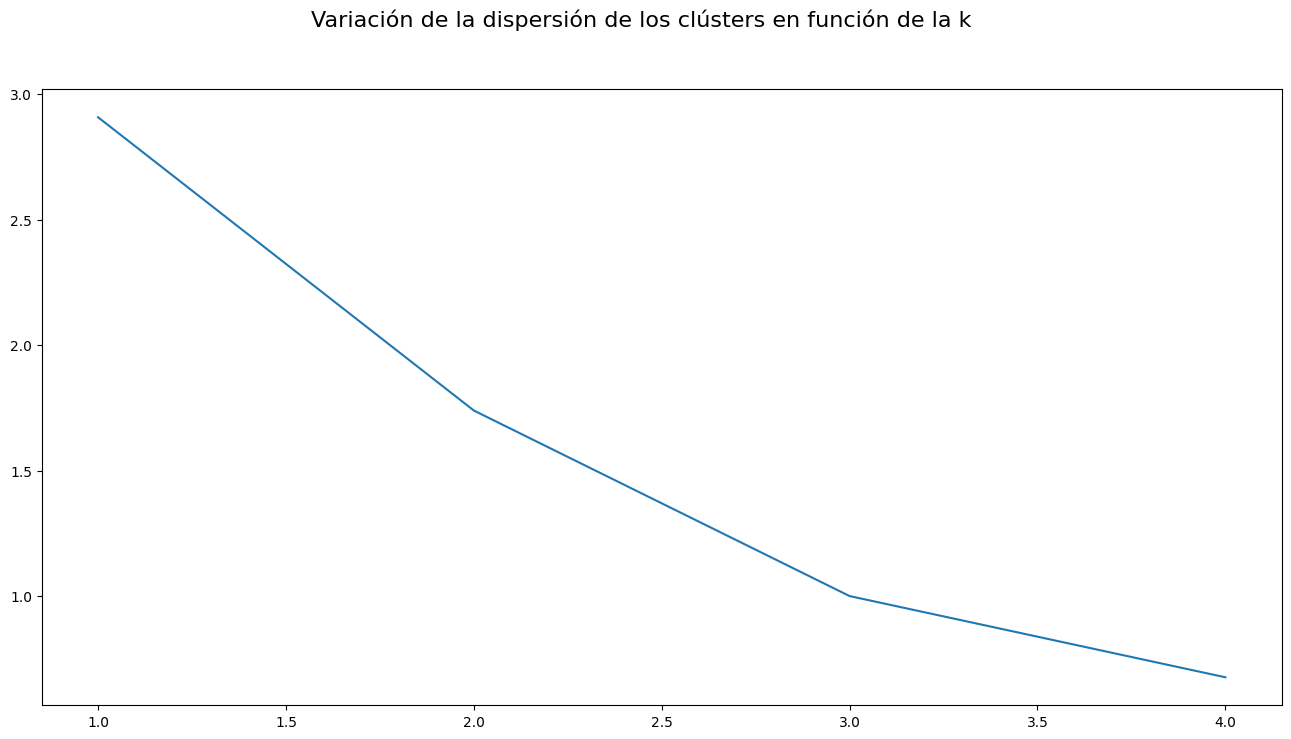

In [84]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sseStore.keys())
y_values = list(sseStore.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

In [85]:
clustering_model = KMeans(n_clusters = 2, random_state=42)
clustering_model.fit(df_store_scaled)

KMeans(n_clusters=2, random_state=42)

In [86]:
labels = clustering_model.predict(df_store_scaled)
df_store["cluster"] = labels

In [87]:
df_store

,total_uds,mean_price,total_rev,range_price,cluster
store_code,,,,,
BOS_1,2797668,5.52,"9,671,678.61",42.09,0
BOS_2,3612892,5.52,"12,666,845.13",38.46,1
BOS_3,3031061,5.54,"10,924,257.74",41.18,0
NYC_1,3845383,5.57,"13,880,586.64",41.07,0
NYC_2,2840946,5.58,"10,740,562.95",40.96,0
NYC_3,5581271,5.54,"19,670,926.49",41.19,1
NYC_4,2052136,5.57,"7,530,130.90",41.19,0
PHI_1,2576156,5.59,"9,115,186.17",44.84,0
PHI_2,3277794,5.60,"10,827,660.49",42.63,0


In [88]:
dfs_store = []  # Crea una lista vacía

In [89]:
for i, col in enumerate(["total_uds","mean_price","range_price", "total_rev"]):
    resumen_data = df_store[["cluster", col]].groupby("cluster").describe().T[1:]
    dfs_store.append(resumen_data)  # Agrega cada DataFrame a la lista

In [90]:
ficha_df_store = pd.concat(dfs_store)

In [91]:
ficha_df_store

cluster                      0             1
total_uds   mean  2,953,522.25  4,597,081.50
            std     529,516.58  1,391,854.14
            min   2,052,136.00  3,612,892.00
            25%   2,742,290.00  4,104,986.75
            50%   2,936,003.50  4,597,081.50
            75%   3,224,724.00  5,089,176.25
            max   3,845,383.00  5,581,271.00
mean_price  mean          5.57          5.53
            std           0.02          0.01
            min           5.52          5.52
            25%           5.56          5.53
            50%           5.57          5.53
            75%           5.58          5.54
            max           5.60          5.54
range_price mean         41.89         39.82
            std           1.33          1.93
            min          40.96         38.46
            25%          41.15         39.14
            50%          41.19         39.82
            75%          42.23         40.51
            max          44.84         41.19
total_rev   mean 10,383,967.49 16,168,885.81
            std   1,816,740.92  4,952,633.42
            min   7,530,130.90 12,666,845.13
            25%   9,532,555.50 14,417,865.47
            50%  10,561,119.69 16,168,885.81
            75%  10,851,809.80 17,919,906.15
            max  13,880,586.64 19,670,926.49

In [92]:
names = ["Grupo Indicadores", "Indicador", "Estadístico"]
index_ficha = generate_multiindex(new_multi_index, names)
ficha_df_store.set_index(index_ficha, inplace = True)

In [93]:
tamaño_clusters = df_store.groupby("cluster").size().to_frame().T
tamaño_clusters.set_index(generate_multiindex([("General", "Clúster", "Tamaño")] , names), inplace = True)

In [94]:
ficha_df_store = pd.concat([tamaño_clusters, ficha_df_store])

In [95]:
ficha_df_store

cluster                                                   0             1
Grupo Indicadores Indicador       Estadístico                            
General           Clúster         Tamaño               8.00          2.00
Cantidad          Total Unidades  Media        2,953,522.25  4,597,081.50
                                  Desviación     529,516.58  1,391,854.14
                                  Mínimo       2,052,136.00  3,612,892.00
                                  Perc. 25     2,742,290.00  4,104,986.75
                                  Perc. 50     2,936,003.50  4,597,081.50
                                  Perc. 75     3,224,724.00  5,089,176.25
                                  Máximo       3,845,383.00  5,581,271.00
Monetario         Precio Promedio Media                5.57          5.53
                                  Desviación           0.02          0.01
                                  Mínimo               5.52          5.52
                                  Perc. 25             5.56          5.53
                                  Perc. 50             5.57          5.53
                                  Perc. 75             5.58          5.54
                                  Máximo               5.60          5.54
                  Rango de precio Media               41.89         39.82
                                  Desviación           1.33          1.93
                                  Mínimo              40.96         38.46
                                  Perc. 25            41.15         39.14
                                  Perc. 50            41.19         39.82
                                  Perc. 75            42.23         40.51
                                  Máximo              44.84         41.19
                  Ganancia        Media       10,383,967.49 16,168,885.81
                                  Desviación   1,816,740.92  4,952,633.42
                                  Mínimo       7,530,130.90 12,666,845.13
                                  Perc. 25     9,532,555.50 14,417,865.47
                                  Perc. 50    10,561,119.69 16,168,885.81
                                  Perc. 75    10,851,809.80 17,919,906.15
                                  Máximo      13,880,586.64 19,670,926.49

In [96]:
ficha_df_store.style.background_gradient(cmap = 'Purples', axis = 1)

En resumen, el cluster 0 tiene una cantidad promedio de unidades y ingresos totales más bajos en comparación con el cluster 1. Sin embargo, el precio medio en el cluster 0 es ligeramente más alto que en el cluster 1. El cluster 1 tiene una mayor variabilidad en todas las medidas en comparación con el cluster 0, como se refleja en las desviaciones estándar más altas. Podemos concluir la afluencia a las tiendas del cluster 1 puede explicarse por su precio medio mas bajo, lo que atrae un volumen mayor cantidad de compras y por ende de ganancias.

In [104]:
df_store.reset_index().groupby("cluster")["store_code"].value_counts()

cluster  store_code
0        BOS_1         1
         BOS_3         1
         NYC_1         1
         NYC_2         1
         NYC_4         1
         PHI_1         1
         PHI_2         1
         PHI_3         1
1        BOS_2         1
         NYC_3         1
Name: count, dtype: int64

Debido a que la division se realiza en dos grupos se considera que la clusterizacion no es necesaria para este caso.